In [ ]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

url_ms1718 = 'https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/METSYM_prevalence/ms1718.csv'
url17_18 = "https://raw.githubusercontent.com/AngelaBurgaleta/TFM_NHANES/main/download_data/merged/nhanes_2017_2018.csv"


data17_18 = pd.read_csv(url17_18)
ms1718 = pd.read_csv(url_ms1718)

#Tabaquismo

Si el candidato ha fumado por lo menos 100 cigarros a lo largo de su vida
1 yes 2 no 7 refused 9 dont know.
Voy a dropear tanto los nulos como el 7 y 9 porque son en total seis candidatos solo

In [ ]:
data17_18.columns

Index(['SEQN', 'BPQ030', 'BPQ040A', 'BPQ050A', 'BPQ090D', 'BPXSY1', 'BPXDI1',
       'SMQ020', 'DBQ700', 'HSD010', 'ALQ130', 'LBXTR', 'RIAGENDR', 'RIDAGEYR',
       'DMDEDUC2', 'MCQ010', 'MCQ080', 'MCQ220', 'MCQ300C', 'DPQ020', 'DPQ030',
       'DPQ040', 'DPQ050', 'LBDHDD', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650',
       'PAQ665', 'SLQ050', 'HIQ011', 'LBXGLU', 'DIQ010', 'DIQ070', 'BMXWT',
       'BMXHT', 'BMXBMI', 'BMXWAIST', 'LBXIN', 'INQ020'],
      dtype='object')

In [ ]:
ms1718.isna().sum()

Unnamed: 0    0
SEQN          0
RIAGENDR      0
BMXWAIST      0
LBXTR         0
BPQ090D       0
LBDHDD        0
BPQ040A       0
BPXSY1        0
BPXDI1        0
BPQ050A       0
LBXGLU        0
DIQ070        0
REQ1          0
REQ2          0
REQ3          0
REQ4          0
REQ5          0
REQ_SUM       0
MET_SYM       0
dtype: int64

In [ ]:
#RECOPILACION PREPROCESADO PARA ESTUDIAR LA PREVALENCIA DE TABAQUISMO ENTRE PERSONAS CON SINDROME METABOLICO
vars_merge = ['SEQN', 'SMQ020', 'RIAGENDR', 'RIDAGEYR']
data1718_smq = data17_18[vars_merge]
vars_merge_ms = ['SEQN', 'MET_SYM']
ms1718_smq = ms1718[vars_merge_ms]

ms1718_smqmerge= pd.merge(data1718_smq, ms1718_smq, on='SEQN')
ms1718_smqmerge= ms1718_smqmerge.dropna(subset=['SMQ020'])

ms1718_smqmerge['SMQ020'] = ms1718_smqmerge.SMQ020.replace({2: 0})
#ms1718_smqmerge['SMQ020'] = ms1718_smqmerge.SMQ020.replace({777: 0})

ms1718_smqmetsym = ms1718_smqmerge[ms1718_smqmerge['MET_SYM'] == 1]

In [ ]:
ms1718_smqmetsym['SMQ020'].value_counts()

0.0    1289
1.0    1224
Name: SMQ020, dtype: int64

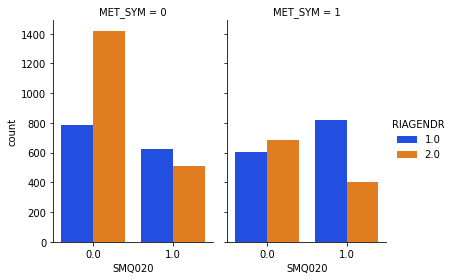

In [ ]:
#pastel, dark, bright, inferno, mute
g = sns.catplot(x="SMQ020", hue="RIAGENDR", col="MET_SYM",
                data=ms1718_smqmerge, kind="count", palette='bright',
                height=4, aspect=.7)

In [ ]:
ms1718_smqmerge.isna().sum()

SEQN        0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
MET_SYM     0
dtype: int64

In [ ]:
ms1718_smqmerge['SMQ020'].unique()

array([1., 0.])

In [ ]:
#REGRESION LINEAL
import statsmodels.api as sm
model = sm.OLS.from_formula("SMQ020 ~ MET_SYM", ms1718_smqmerge)
result = model.fit()
result.summary()
#33% más de posiblidades de presentar sindrome metabolico para un fumador 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SMQ020   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     132.7
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.19e-30
Time:                        15:27:07   Log-Likelihood:                -4071.9
No. Observations:                5856   AIC:                             8148.
Df Residuals:                    5854   BIC:                             8161.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3395      0.008     40.468      0.000       0.323       0.356
MET_SYM        0.1476      0.013     11.521      0.000       0.122       0.173
==============================================================================
Omnibus:                    24327.009   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              897.897
Skew:                           0.384   Prob(JB):                    1.06e-195
Kurtosis:                       1.243   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ms1718_smqmerge.corr()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,MET_SYM
SEQN,1.000000,-0.004396,-0.000375,-0.008103,0.016895
SMQ020,-0.004396,1.000000,-0.210353,0.173370,0.148901
RIAGENDR,-0.000375,-0.210353,1.000000,-0.017953,-0.142392
RIDAGEYR,-0.008103,0.173370,-0.017953,1.000000,0.458175
MET_SYM,0.016895,0.148901,-0.142392,0.458175,1.000000


In [ ]:
cc = ms1718_smqmerge[["MET_SYM", "SMQ020"]].corr()
print(cc.SMQ020.MET_SYM**2)
#correlacion cuadrada, el 4.4% de los casos de sindrome metabolico se explica por tabaquismo

0.022171474700375872


In [ ]:
ms1718_smqmerge[["RIDAGEYR", "RIAGENDR", "MET_SYM"]].corr()
#por edad hay una correlacion de 46% evidentemente

,RIDAGEYR,RIAGENDR,MET_SYM
RIDAGEYR,1.000000,-0.017953,0.458175
RIAGENDR,-0.017953,1.000000,-0.142392
MET_SYM,0.458175,-0.142392,1.000000


In [ ]:
ms1718_smqmerge[["RIDAGEYR", "RIAGENDR", "SMQ020"]].corr()

,RIDAGEYR,RIAGENDR,SMQ020
RIDAGEYR,1.000000,-0.017953,0.173370
RIAGENDR,-0.017953,1.000000,-0.210353
SMQ020,0.173370,-0.210353,1.000000


In [ ]:
ms1718_smqmerge['SMQ020'].unique()

array([1., 0.])

In [ ]:
ms1718_smqmerge['RIAGENDRx'] = ms1718_smqmerge.RIAGENDR.replace({1: 'Male', 2: 'Female'})

In [ ]:
ms1718_smqmerge.head(8)

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,MET_SYM,RIAGENDRx
0,93705,1.0,2.0,66.0,0,Female
1,93706,0.0,1.0,18.0,0,Male
2,93708,0.0,2.0,66.0,1,Female
3,93709,1.0,2.0,75.0,1,Female
4,93711,0.0,1.0,56.0,0,Male
5,93712,1.0,1.0,18.0,0,Male
6,93713,1.0,1.0,67.0,0,Male
7,93714,1.0,2.0,54.0,1,Female


##Logistic regression

Para este caso que se trata de variables binarias lo indicado es trabajar con esto

In [ ]:
c = pd.crosstab(ms1718_smqmerge.RIAGENDRx, ms1718_smqmerge.SMQ020).apply(lambda x: x/x.sum(), axis=1)
c["odds"] = c.loc[:, 1] / c.loc[:, 0]
c

#30% de probs de que una mujer fume vs 51% de probs de que un hombre fume

SMQ020,0.0,1.0,odds
RIAGENDRx,,,
Female,0.697281,0.302719,0.434142
Male,0.490845,0.509155,1.037303


In [ ]:
c.odds.Male / c.odds.Female

#Los hombres tienen el doble de posibilidades de fumar

2.389318327175927

In [ ]:
c["logodds"] = np.log(c.odds)
c

SMQ020,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.697281,0.302719,0.434142,-0.834384
Male,0.490845,0.509155,1.037303,0.036624


In [ ]:
d = pd.crosstab(ms1718_smqmerge.RIAGENDRx, ms1718_smqmerge.MET_SYM).apply(lambda x: x/x.sum(), axis=1)
d["odds"] = d.loc[:, 1] / d.loc[:, 0]
d


MET_SYM,0,1,odds
RIAGENDRx,,,
Female,0.639257,0.360743,0.564315
Male,0.498239,0.501761,1.007067


In [ ]:
d["logodds"] = np.log(d.odds)
d

MET_SYM,0,1,odds,logodds
RIAGENDRx,,,,
Female,0.639257,0.360743,0.564315,-0.572142
Male,0.498239,0.501761,1.007067,0.007042


In [ ]:
d.odds.Male / d.odds.Female
#mucho mas probable que un hombre tenga met sym

1.7845822074412805

In [1]:
1.007067	/0.564315

1.784583078599718

In [ ]:
s = pd.crosstab(ms1718_smqmerge.SMQ020, ms1718_smqmerge.MET_SYM).apply(lambda x: x/x.sum(), axis=1)
s["odds"] = s.loc[:, 1] / s.loc[:, 0]


MET_SYM,0,1,odds
SMQ020,,,
0.0,0.631398,0.368602,0.583786
1.0,0.481136,0.518864,1.078414


In [2]:
1.078414	/ 0.583786
#bastante mas probable que un fumador tenga sindrome metabolico 

1.8472762279328383